# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
lat = []
lon = []
temp_max = []
humidity = []
cloud = []
wind = []
dt = []
city_name = []
set_count = 1
record_count = 1
print("Beginning Data Retrieval")
print("-----------------------------------")
for index, city in enumerate(cities):
    if(index % 50 == 0 and index >=50):
        set_count += 1
        record_count = 0
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        city_query = query_url + city
        response = requests.get(city_query).json()

        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloud = response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_date = response['dt']

        lat.append(city_lat)
        lon.append(city_lon)
        temp_max.append(city_max_temp)
        humidity.append(city_humidity)
        cloud.append(city_cloud)
        wind.append(city_wind_speed)
        dt.append(city_date)
        city_name.append(city)
        
    except:
        print("City not found")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lon, "Max Temp": temp_max, 
                "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind,
                "Date": dt
               })

weather_data.to_csv("cities.csv")
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,luau,-10.71,22.22,18.95,88,91,1.59,1602282591
1,mount gambier,-37.83,140.77,11.00,100,40,2.60,1602282592
2,tiksi,71.69,128.87,-4.81,95,98,4.50,1602282593
3,puerto ayora,-0.74,-90.35,23.00,73,20,8.70,1602282593
4,bengkulu,-3.80,102.27,24.38,83,100,1.52,1602282541
...,...,...,...,...,...,...,...,...
585,san patricio,28.02,-97.52,33.33,49,75,6.20,1602283075
586,hammond,41.58,-87.50,27.00,36,1,6.20,1602282870
587,tiznit,29.58,-9.50,23.66,40,31,0.23,1602283076
588,hillsborough,37.57,-122.38,22.22,68,75,5.10,1602282896


In [13]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,20.697203,18.239119,17.053339,72.142373,47.232203,3.535102,1.602283e+09
std,33.516822,89.676505,10.057339,21.143059,39.056078,2.593816,1.322672e+02
min,-54.800000,-175.200000,-11.510000,5.000000,0.000000,0.170000,1.602282e+09
25%,-7.307500,-61.487500,9.612500,61.000000,2.000000,1.620000,1.602283e+09
50%,24.745000,25.105000,19.130000,77.000000,41.500000,2.965000,1.602283e+09
75%,50.432500,91.577500,25.150000,88.000000,90.000000,4.735000,1.602283e+09
max,78.220000,179.320000,37.000000,100.000000,100.000000,22.100000,1.602283e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
high_humid = weather_data.loc[(weather_data["Humidity"] > 100)]
high_humid

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

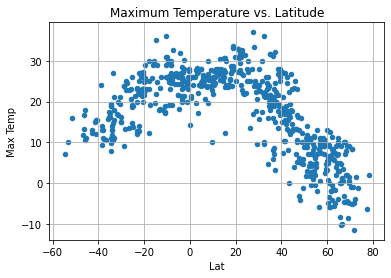

In [19]:
weather_data.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Maximum Temperature vs. Latitude")

plt.grid()


## Latitude vs. Humidity Plot

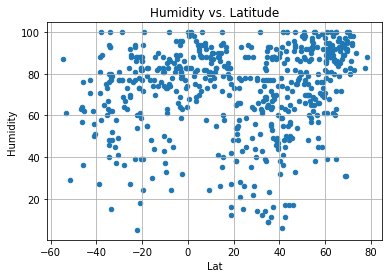

In [20]:
weather_data.plot(kind='scatter', x='Lat', y='Humidity')
plt.title("Humidity vs. Latitude")

plt.grid()


## Latitude vs. Cloudiness Plot

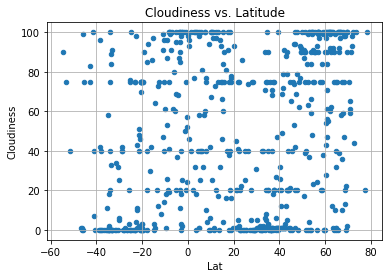

In [21]:
weather_data.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.title("Cloudiness vs. Latitude")

plt.grid()


## Latitude vs. Wind Speed Plot

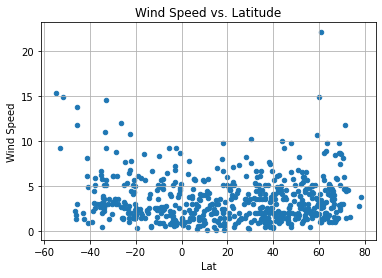

In [22]:
weather_data.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.title("Wind Speed vs. Latitude")

plt.grid()


## Linear Regression

In [36]:
def linreg(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show() 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8173262067184718


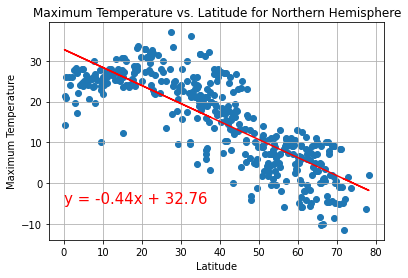

In [39]:
north_city = weather_data.loc[(weather_data["Lat"] >= 0)]

north_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Maximum Temperature vs. Latitude for Northern Hemisphere")
plt.grid()
x_values = north_city["Lat"]

y_values = north_city["Max Temp"]

linreg(north_city["Lat"],north_city["Max Temp"], "Maximum Temperature", (0,-5))








####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7003893704280081


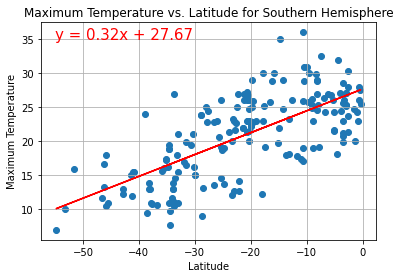

In [41]:
south_city = weather_data.loc[(weather_data["Lat"] < 0)]

south_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Maximum Temperature vs. Latitude for Southern Hemisphere")
plt.grid()
x_values = south_city["Lat"]

y_values = south_city["Max Temp"]

linreg(south_city["Lat"],south_city["Max Temp"], "Maximum Temperature", (-55,35))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15186496598024654


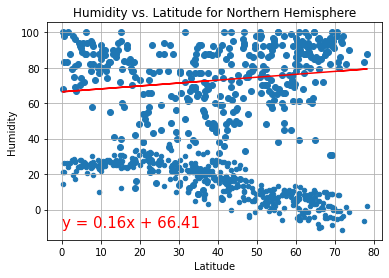

In [44]:
north_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Humidity vs. Latitude for Northern Hemisphere")
plt.grid()
x_values = north_city["Lat"]

y_values = north_city["Humidity"]

linreg(north_city["Lat"],north_city["Humidity"], "Humidity", (0,-10))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2026141711989729


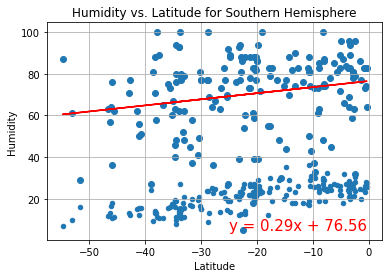

In [50]:
south_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Humidity vs. Latitude for Southern Hemisphere")
plt.grid()
x_values = south_city["Lat"]

y_values = south_city["Humidity"]

linreg(south_city["Lat"],south_city["Humidity"], "Humidity", (-25,5))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18610442395293902


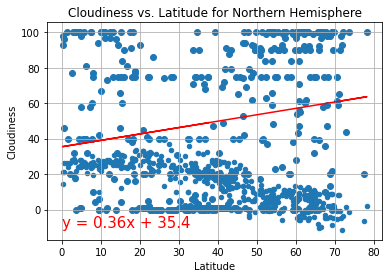

In [51]:
north_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Cloudiness vs. Latitude for Northern Hemisphere")
plt.grid()
x_values = north_city["Lat"]

y_values = north_city["Cloudiness"]

linreg(north_city["Lat"],north_city["Cloudiness"], "Cloudiness", (0,-10))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3048825444582238


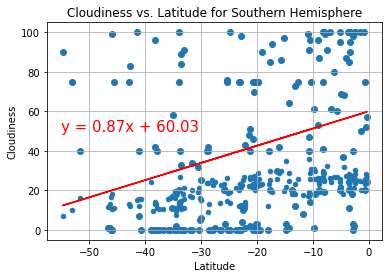

In [54]:
south_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Cloudiness vs. Latitude for Southern Hemisphere")
plt.grid()
x_values = south_city["Lat"]

y_values = south_city["Cloudiness"]

linreg(south_city["Lat"],south_city["Cloudiness"], "Cloudiness", (-55,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17239425980327447


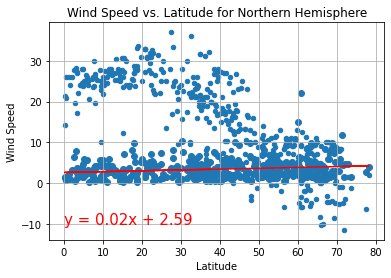

In [55]:
north_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Wind Speed vs. Latitude for Northern Hemisphere")
plt.grid()
x_values = north_city["Lat"]

y_values = north_city["Wind Speed"]

linreg(north_city["Lat"],north_city["Wind Speed"], "Wind Speed", (0,-10))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2785250462374348


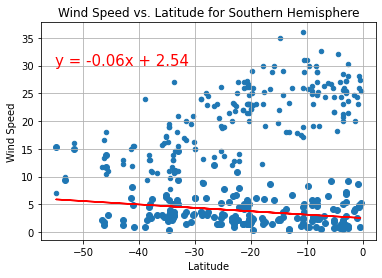

In [57]:
south_city.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title("Wind Speed vs. Latitude for Southern Hemisphere")
plt.grid()
x_values = south_city["Lat"]

y_values = south_city["Wind Speed"]

linreg(south_city["Lat"],south_city["Wind Speed"], "Wind Speed", (-55,30))